# Part 1 - random sampling of electric guitars

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
data = pd.read_csv("allguitnewnew2.csv")
data['Price'] = pd.to_numeric(data['Price'], errors='coerce', downcast='float')
data['Year'] = pd.to_numeric(data['Year'], errors='coerce', downcast='integer')

#filtered_pr['Price'] = filtered_pr['Price'].astype(float)
#filtered_pr['Price'].head()

We're looking at Ebay electric guitar listings with price > 280$

Brand
Schecter Guitar Research     307
Gibson                       401
PRS                          413
Unbranded                    434
Jackson                      598
Dean                         750
ESP                          926
Ibanez                      1265
Fender                      1282
Schecter                    1322
dtype: int64
      Brand    Year    Material                ProductLine            Model  \
0   Jackson     NaN         NaN                        NaN       2910124520   
1       DEB  2019.0      Okoume  DEB Luthier Built Guitars           Custom   
2     KTONE     NaN         NaN                        NaN              NaN   
3   Vintage     NaN  Solid Wood                        NaN            V62AB   
4  Epiphone     NaN         NaN                        NaN  Sheraton II PRO   

  StringConfiguration            Color     BodyType          Hand       Price  
0            6 String  Matte Army Drab        Solid  Right-Handed  299.989990  
1            6 S

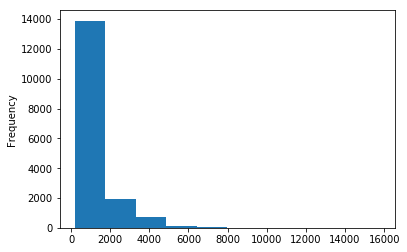

In [7]:
print(data.groupby('Brand').size().sort_values().tail(10))
print(data.head())
data[data['Price'] < 100000][ 'Price'].plot.hist()

Histogram of all prices looks like Poisson distribution to me.

Now looking at three histograms for Ibanez, Fender and Gibson.

mean price: 961.68408203125
stddev : 664.8438720703125
median : 767.0


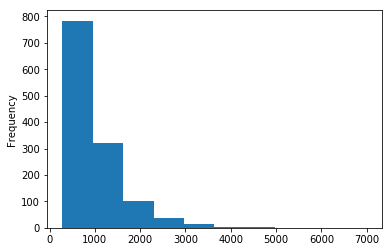

In [253]:
data[data['Brand'] == "Ibanez"]['Price'].plot.hist()
print("mean price: " + str(data[data['Brand'] == "Ibanez"]['Price'].mean()))
print("stddev : " + str(data[data['Brand'] == "Ibanez"]["Price"].std()))
print("median : " + str(data[data['Brand'] == "Ibanez"]['Price'].median()))

mean price: 1254.2010498046875
stddev : 766.2775268554688
median : 1024.989990234375


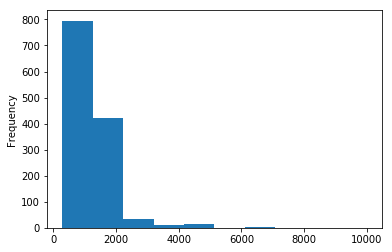

In [254]:
data[data['Brand'] == "Fender"]['Price'].plot.hist()
print("mean price: " + str(data[data['Brand'] == "Fender"]['Price'].mean()))
print("stddev : " + str(data[data['Brand'] == "Fender"]['Price'].std()))
print("median : " + str(data[data['Brand'] == "Fender"]['Price'].median()))

mean price: 2105.847412109375
stddev : 1001.06787109375
median : 1911.0


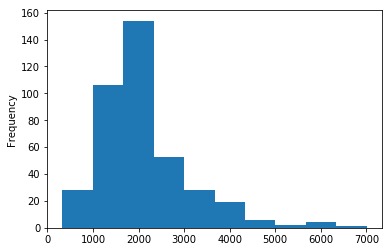

In [255]:
data[data['Brand'] == "Gibson"]['Price'].plot.hist()
print("mean price: " + str(data[data['Brand'] == "Gibson"]['Price'].mean()))
print("stddev : " + str(data[data['Brand'] == "Gibson"]['Price'].std()))
print("median : " + str(data[data['Brand'] == "Gibson"]['Price'].median()))

Now let's look at age dependence of prices

D:\conda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Year,Price
Year,1.000000,-0.124991
Price,-0.124991,1.000000


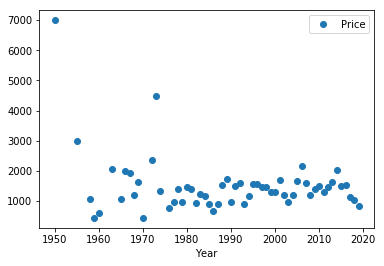

In [256]:
tmp = data[data['Year'].notnull()]
yearly = tmp[tmp['Price'] < 100000][tmp['Year'] < 2100]
#yearly.plot(x='Year',y='Price', style='o')

yearly.groupby('Year').mean().plot(style='o')
yearly.corr(method='pearson')

So, for all guitars if we don't take outstanding points into account, it's pretty unclear, does price increase or decrease with age. Now let's look brand-wise.

D:\conda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


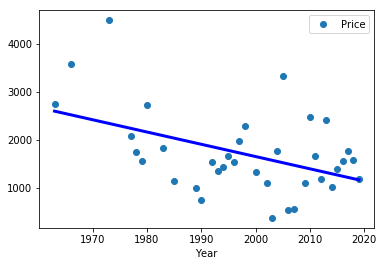

In [250]:
tmp = data[data['Year'].notnull()]
yearly = tmp[tmp['Price'] < 100000][tmp['Brand'] == "Fender"]
#yearly.plot(x='Year',y='Price', style='o')
yearly.groupby('Year').mean().plot(style='o')
gby = yearly.groupby('Year')['Price'].mean()
x = gby.index.values.reshape(gby.size,1)
y = gby.values.reshape(gby.size,1)
regr = linear_model.LinearRegression()
regr.fit(x,y)
#plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
#plt.xticks(())
#plt.yticks(())
plt.show()

D:\conda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


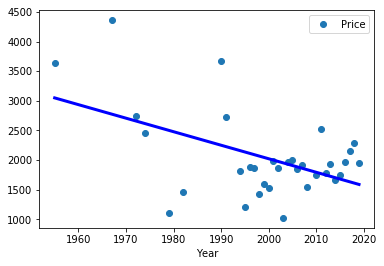

In [251]:
tmp = data[data['Year'].notnull()]
yearly = tmp[tmp['Price'] < 100000][tmp['Brand'] == "Gibson"]
#yearly.plot(x='Year',y='Price', style='o')
yearly.groupby('Year').mean().plot(style='o')
yearly.corr(method='pearson')
gby = yearly.groupby('Year')['Price'].mean()
x = gby.index.values.reshape(gby.size,1)
y = gby.values.reshape(gby.size,1)
regr = linear_model.LinearRegression()
regr.fit(x,y)
#plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
#plt.xticks(())
#plt.yticks(())
plt.show()

D:\conda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


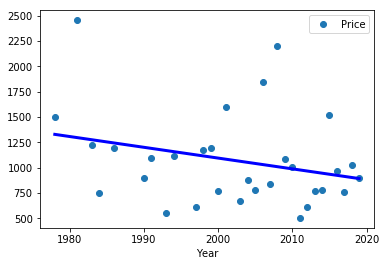

In [252]:
tmp = data[data['Year'].notnull()]
yearly = tmp[tmp['Price'] < 100000][tmp['Brand'] == "Ibanez"]
#yearly.plot(x='Year',y='Price', style='o')
yearly.groupby('Year').mean().plot(style='o')
yearly.corr(method='pearson')
gby = yearly.groupby('Year')['Price'].mean()
x = gby.index.values.reshape(gby.size,1)
y = gby.values.reshape(gby.size,1)
regr = linear_model.LinearRegression()
regr.fit(x,y)
#plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
#plt.xticks(())
#plt.yticks(())
plt.show()

I think it's pretty visible that for famous brands like Gibson or Fender average price increases with age.
Now let's look at prices by material.

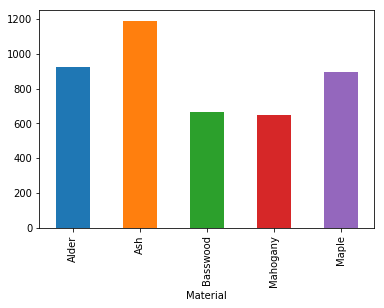

In [265]:
bodies = data.groupby('Material').size()
bodies.sort_values().tail(10)

pr = data[data['Material'].isin(['Alder','Mahogany','Maple','Basswood','Ash'])].groupby('Material')['Price'].median()
pr.plot.bar()

# Part 2 - brand-wise specifically scraped data

### You can get more results if you scrape search results for specific brand

In [43]:
data = pd.read_csv("fendersnew.csv",quotechar="'",error_bad_lines=False)
data['Price'] = pd.to_numeric(data['Price'], errors='coerce', downcast='float')
data['Year'] = pd.to_numeric(data['Year'], errors='coerce', downcast='integer')

b'Skipping line 580: expected 10 fields, saw 13\nSkipping line 1163: expected 10 fields, saw 13\nSkipping line 1237: expected 10 fields, saw 13\nSkipping line 1736: expected 10 fields, saw 13\nSkipping line 1936: expected 10 fields, saw 13\nSkipping line 2201: expected 10 fields, saw 13\nSkipping line 2436: expected 10 fields, saw 13\nSkipping line 2493: expected 10 fields, saw 13\nSkipping line 3207: expected 10 fields, saw 13\nSkipping line 3583: expected 10 fields, saw 13\nSkipping line 3972: expected 10 fields, saw 13\nSkipping line 4177: expected 10 fields, saw 12\nSkipping line 5641: expected 10 fields, saw 12\nSkipping line 6399: expected 10 fields, saw 13\nSkipping line 6587: expected 10 fields, saw 14\nSkipping line 6630: expected 10 fields, saw 12\nSkipping line 7081: expected 10 fields, saw 13\nSkipping line 7642: expected 10 fields, saw 11\nSkipping line 8066: expected 10 fields, saw 15\nSkipping line 8192: expected 10 fields, saw 13\nSkipping line 8229: expected 10 fields,

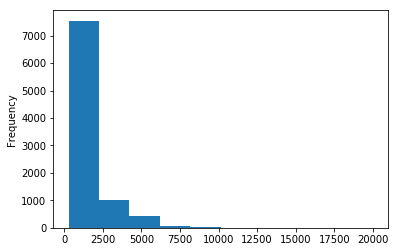

In [44]:
data[data['Price'] < 20000]['Price'].plot.hist()

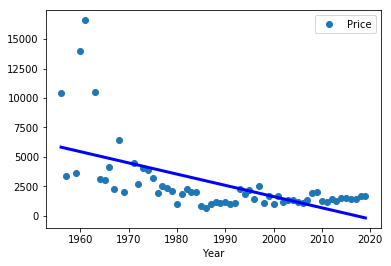

In [45]:
tmp = data[data['Year'].notnull()]
yearly = tmp[tmp['Price'] < 30000]
#yearly.plot(x='Year',y='Price', style='o')
yearly.groupby('Year').mean().plot(style='o')
yearly.corr(method='pearson')
gby = yearly.groupby('Year')['Price'].mean()
x = gby.index.values.reshape(gby.size,1)
y = gby.values.reshape(gby.size,1)
regr = linear_model.LinearRegression()
regr.fit(x,y)
#plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
#plt.xticks(())
#plt.yticks(())
plt.show()

### Now, for bigger dataset of Fender listings we can see that yearly price dependency is a bit more complex for simple linear regression


#### From what we can see it's reasonable to look at it as a decline before year 1985 and increase after that. So let's look at these two parts separately

D:\conda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


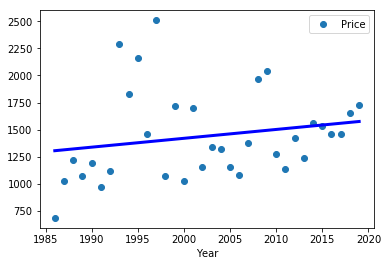

In [46]:
tmp = data[data['Year'].notnull()][data['Year'] > 1985][data['Year'] < 2020]
yearly = tmp[tmp['Price'] < 30000]
#yearly.plot(x='Year',y='Price', style='o')
yearly.groupby('Year').mean().plot(style='o')
yearly.corr(method='pearson')
gby = yearly.groupby('Year')['Price'].mean()
x = gby.index.values.reshape(gby.size,1)
y = gby.values.reshape(gby.size,1)
regr = linear_model.LinearRegression()
regr.fit(x,y)
#plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
#plt.xticks(())
#plt.yticks(())
plt.show()

D:\conda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


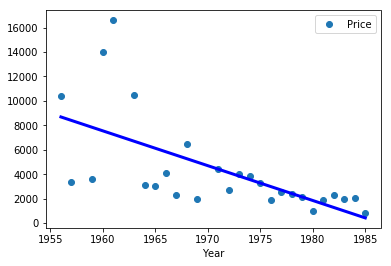

In [7]:
tmp = data[data['Year'].notnull()][data['Year'] <= 1985][data['Year'] < 2020]
yearly = tmp[tmp['Price'] < 30000]
#yearly.plot(x='Year',y='Price', style='o')
yearly.groupby('Year').mean().plot(style='o')
yearly.corr(method='pearson')
gby = yearly.groupby('Year')['Price'].mean()
x = gby.index.values.reshape(gby.size,1)
y = gby.values.reshape(gby.size,1)
regr = linear_model.LinearRegression()
regr.fit(x,y)
#plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
#plt.xticks(())
#plt.yticks(())
plt.show()

### So, we clearly can see two different dependencies for years < 1985 and > 1985.

### Now let's look more closely if there are significant differences in price with materials and models

In [53]:
ash = data[data['Price'] < 20000][data['Material'].str.contains("Ash") == True]
alder = data[data['Price'] < 20000][data['Material'].str.contains("Alder") == True]
basswood = data[data['Price'] < 20000][data['Material'].str.contains("Basswood") == True]

print(len(ash))
print(len(alder))
print(len(basswood))

meanAsh = ash['Price'].mean()
stdAsh = ash['Price'].std()
medAsh = ash['Price'].median()

meanAld = alder['Price'].mean()
stdAld = alder['Price'].std()
medAld = alder['Price'].median()

meanBas = basswood['Price'].mean()
stdBas = basswood['Price'].std()
medBas = basswood['Price'].median()


print ("Price for guitars with ash as one of the materials mean:", meanAsh, "stddev:", stdAsh, "median:", medAsh)
print("Price for guitars with alder as one of the materials mean:", meanAld, "stddev:", stdAld,"median:", medAld)
print("Price for guitars with basswood as one of the materials mean:", meanBas, "stddev:", stdBas,"median:", medBas)


480
1795
75
Price for guitars with ash as one of the materials mean: 2037.5198974609375 stddev: 1424.1680908203125 median: 1797.0
Price for guitars with alder as one of the materials mean: 1455.76904296875 stddev: 1042.494873046875 median: 1099.989990234375
Price for guitars with basswood as one of the materials mean: 936.69677734375 stddev: 578.562744140625 median: 899.989990234375


D:\conda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
D:\conda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
D:\conda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [54]:
strat = data[data['Price'] < 100000][data['ProductLine'].str.contains("Stratocaster") == True]
tele = data[data['Price'] < 100000][data['ProductLine'].str.contains("Telecaster") == True]
jags = data[data['Price'] < 100000][data['ProductLine'].str.contains("Jaguar") == True]

print(len(strat))
print(len(tele))
print(len(jags))

meanStr = strat['Price'].mean()
stdStr = strat['Price'].std()
medStr = strat['Price'].median()


meanTele = tele['Price'].mean()
stdTele = tele['Price'].std()
medTele = tele['Price'].median()

meanJag = jags['Price'].mean()
stdJag = jags['Price'].std()
medJag = jags['Price'].median()

print ("Strats mean:", meanStr, "stddev:", stdStr , "median: ", medStr)
print("Telecasters mean:", meanTele, "stddev:", stdTele, "median: ", medTele)
print("Jaguars mean:", meanJag, "stddev:", stdJag, "median: ", medJag)


618
340
29
Strats mean: 1488.603271484375 stddev: 2247.30419921875 median:  1000.0
Telecasters mean: 1569.3095703125 stddev: 1783.83935546875 median:  1249.5
Jaguars mean: 1676.545166015625 stddev: 1742.376953125 median:  1099.0


D:\conda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
D:\conda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
D:\conda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


#### Looking at most famous Fender models and materials we can certainly say that guitars made of ash wood are quite more expensive than alder ones (pretty large difference in medians)

#### Unfortunately most listings do not have material listed, so we don't have much data for Jaguars for example.

#### So, main question so far - what happened around year 1985?

Finally looking at some historical data - 

```
1982 - William Schultz practically shut down U.S production of Fender guitars. Focussing on reissuing limited edition high end “classic” pre CBS Fenders.

1983 - Japanese Squiers hit the U.S market

1985 - On the 5th of March, CBS sells up to the management group run by William Schultz for $12.5 million. The company name was changed to Fender Musical Instruments Corporation. However, the sale did not include many Fender patents, machinery and nor the Fullerton facility, which was sold separately. As a result, no U.S production was taking place. Only Japanese models appeared in the 1985 catalogue. At this point after the sale. Fender Musical Instruments Corp. were roughly $11 million in debt.
```

I honestly did not know that before starting this data exploration...

### Now let's look at exclusively scraped Gibson listings

In [14]:
data = pd.read_csv("gibsonsnew2.csv",quotechar="'",error_bad_lines=False)
data['Price'] = pd.to_numeric(data['Price'], errors='coerce', downcast='float')
data['Year'] = pd.to_numeric(data['Year'], errors='coerce', downcast='integer')

D:\conda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


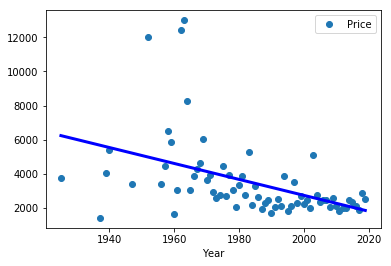

In [15]:
tmp = data[data['Year'].notnull()]
yearly = tmp[tmp['Price'] < 30000][tmp['Year'] < 2020][tmp['Year'] > 1920]
#yearly.plot(x='Year',y='Price', style='o')
yearly.groupby('Year').mean().plot(style='o')
yearly.corr(method='pearson')
gby = yearly.groupby('Year')['Price'].mean()
x = gby.index.values.reshape(gby.size,1)
y = gby.values.reshape(gby.size,1)
regr = linear_model.LinearRegresson()
regr.fit(x,y)
#plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
#plt.xticks(())
#plt.yticks(())
plt.show()

D:\conda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


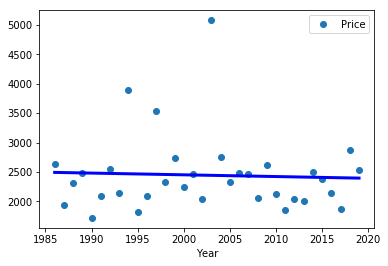

In [17]:
tmp = data[data['Year'].notnull()]
yearly = tmp[tmp['Price'] < 30000][tmp['Year'] < 2020][tmp['Year'] > 1985]
#yearly.plot(x='Year',y='Price', style='o')
yearly.groupby('Year').mean().plot(style='o')
yearly.corr(method='pearson')
gby = yearly.groupby('Year')['Price'].mean()
x = gby.index.values.reshape(gby.size,1)
y = gby.values.reshape(gby.size,1)
regr = linear_model.LinearRegression()
regr.fit(x,y)
#plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
#plt.xticks(())
#plt.yticks(())
plt.show()

D:\conda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


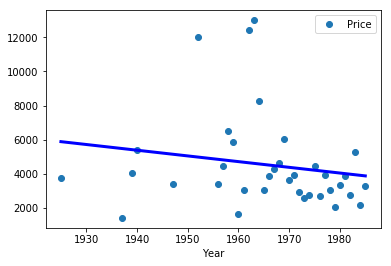

In [19]:
tmp = data[data['Year'].notnull()]
yearly = tmp[tmp['Price'] < 30000][tmp['Year'] < 2020][tmp['Year'] > 1920 ][tmp['Year'] <= 1985]
#yearly.plot(x='Year',y='Price', style='o')
yearly.groupby('Year').mean().plot(style='o')
yearly.corr(method='pearson')
gby = yearly.groupby('Year')['Price'].mean()
x = gby.index.values.reshape(gby.size,1)
y = gby.values.reshape(gby.size,1)
regr = linear_model.LinearRegression()
regr.fit(x,y)
#plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
#plt.xticks(())
#plt.yticks(())
plt.show()

### And again, not so clearly visible like in the Fender case, while overall price seems to be increasing with age, for guitars made after year 1985 price does not decline, like in Fender case, but stays pretty steady, when for older guitars it certainly increases

#### Looking at history - and it all makes sense again, around 1985 Gibson shut down its original factory

```

1983-86 In 1983, Norlin is bought by Rooney Pace and Piezo Electric Products, and the new owners put the Gibson music division up for sale. Meanwhile, the Kalamazoo plant is shut down and the Nashville facility becomes Gibson’s headquarters. Guitar enthusiasts Henry Juszkiewicz and David Berryman purchase the company in January 1986, and immediately set about restoring Gibson’s financial viability and reviving its reputation as manufacturer of the best stringed instruments in the world. The company begins a period of renewed growth characterized by further emphasis on innovation and the acquisition of other instrument companies.

```

### Now let's look at not so famous brand, Ibanez

In [21]:
data = pd.read_csv("ibaneznew2.csv",quotechar="'",error_bad_lines=False)
data['Price'] = pd.to_numeric(data['Price'], errors='coerce', downcast='float')
data['Year'] = pd.to_numeric(data['Year'], errors='coerce', downcast='integer')

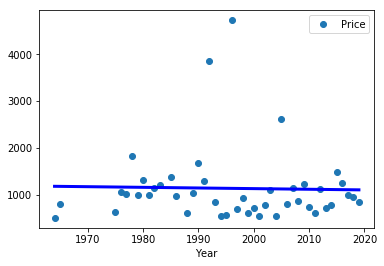

In [23]:
tmp = data[data['Year'].notnull()]
yearly = tmp[tmp['Price'] < 30000][tmp['Year'] < 2020][tmp['Year'] > 1920]
#yearly.plot(x='Year',y='Price', style='o')
yearly.groupby('Year').mean().plot(style='o')
yearly.corr(method='pearson')
gby = yearly.groupby('Year')['Price'].mean()
x = gby.index.values.reshape(gby.size,1)
y = gby.values.reshape(gby.size,1)
regr = linear_model.LinearRegression()
regr.fit(x,y)
#plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
#plt.xticks(())
#plt.yticks(())
plt.show()

### Looks like for Ibanez there is not a lot of demand for vintage guitars, so average prices do not change a lot with age.